
## Step 0: Import Datasets

In [1]:
import numpy as np
from glob import glob
from pathlib import Path
import os

# load filenames for human and dog images
human_files = np.array(glob(os.path.join(str(Path.home()), "data/dog_breed/lfw/*/*")))
dog_files = np.array(glob(os.path.join(str(Path.home()), "data/dog_breed/dogImages/*/*/*")))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

%load_ext autoreload
%autoreload 2

There are 13233 total human images.
There are 8351 total dog images.


## Step 1: Detect Humans

Number of faces detected: 1


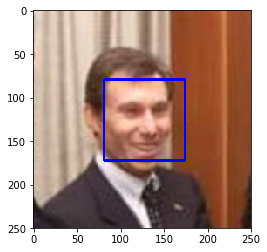

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

### Write a Human Face Detector

In [3]:
from detect_humans import is_human, get_accuracy

In [4]:
from tqdm import tqdm

human_files_short = human_files[:10]
dog_files_short = dog_files[:10]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
get_accuracy(human_files_short, n=10), 1 - get_accuracy(dog_files_short, n=10)

(1.0, 0.9)

## Step 2: Detect Dogs

In [5]:
from detect_dogs import get_accuracy
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print(1 - get_accuracy(human_files_short, n=10))
print(get_accuracy(dog_files_short, n=10))

1.0
1.0


## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

In [6]:
import torch
from dog_breeds import test_model, get_model_v3
filename='models/resnet50_v2.pt'
model = get_model_v3()
model.load_state_dict(torch.load(filename, map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
test_model(model)

In [9]:
from dog_breeds import predict_breed
from data_prep import get_classes

classes = get_classes()
class_names = [item[4:].replace("_", " ") for item in classes]

img_path = 'images/Curly-coated_retriever_03896.jpg'
predict_breed(model, img_path, class_names)

'Curly-coated retriever'

## Step 5: Write your Algorithm

In [10]:
from dog_breeds import run_app

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Hello Human!


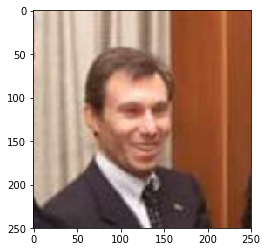

You look like a ... Dachshund

-----------------------------------

Hello Human!


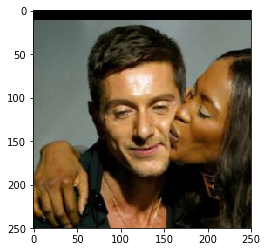

You look like a ... Chihuahua

-----------------------------------

Hello Human!


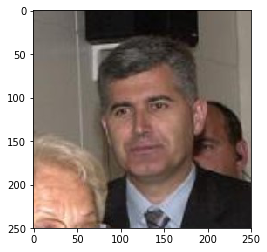

You look like a ... Ibizan hound

-----------------------------------



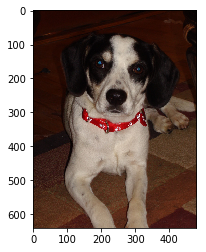

This is a picture of a ... Pointer

-----------------------------------



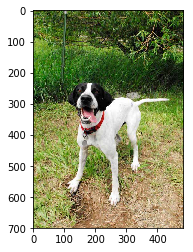

This is a picture of a ... Pointer

-----------------------------------

Hello Human!


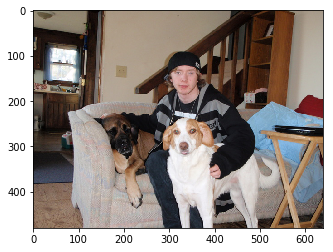

You look like a ... Parson russell terrier

-----------------------------------



In [12]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(model, file, class_names)